<a href="https://colab.research.google.com/github/AlanFirmino2024/projeto_cd/blob/main/main_0110v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto da disciplina de Tópicos de projetos 4**

##     Alan Firmino da Silva

# **1. Definição do problema**

O *dataset* utilizado nesse projeto será o **Imóveis**, proveniente do curso de Data Science da Alura (Alura é a maior escola de tecnologia do Brasil). Seu objetivo é prever os valores dos imóveis residenciais, com base nos atributos de imóveis presentes no *dataset*.

Como o *dataset* possui dados de imóveis residenciais e comerciais, há a necessidade de fazer um filtro posteriormente. Outro ponto importante para salientar, é que no *dataset* há 21 atributos e usaremos apenas 14 deles.

O *dataset* está em um formato não convencional (**JSON**) ao que foi visto na disciplina (**CSV**), por isso faremos um breve tutorial de como visualizar esses dados com o arquivo, apenas para conhecimento.


## Tutorial de como visualizar um arquivo JSON

Primeiro abra o arquivo JSON em seu computador com o bloco de notas, e copie um trecho do texto. A seguir entre no site [JSON Viewer](http://jsonviewer.stack.hu) e na aba ***Text***, cole o texto copiado, como mostrado na figura abaixo.
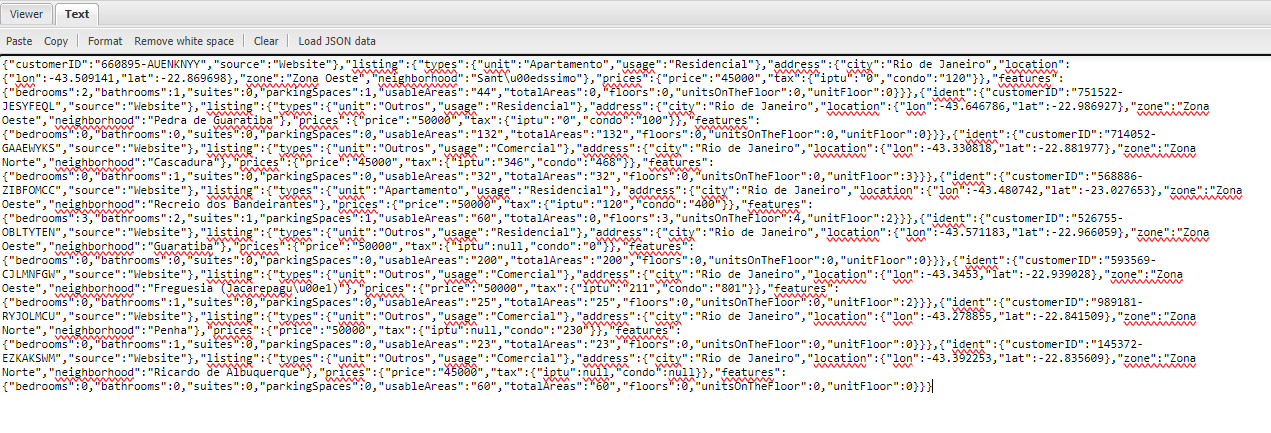

Após isso, clique no botão *Format* e veremos que a estrutura do arquivo é muito similar ao do dicionário no *Python*. Como é mostrado na figura abaixo.

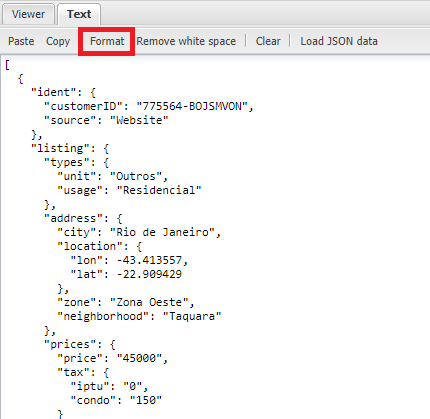

## Informações sobre os atributos.

1. **unidade**: Identificador único do imóvel.
2. **zona**: Zona ou região da cidade (bairro ou distrito) onde o imóvel está localizado.
3. **preco**: Preço total do imóvel.
4. **taxa_iptu**: Valor do IPTU.
5. **taxa_condo**: Valor mensal da taxa de condomínio.
6. **quartos**: Número de quartos no imóvel.
7. **banheiros**: Número de banheiros no imóvel.
8. **suites**: Número de suítes.
9. **vagas_estac**: Número de vagas de garagem disponíveis.
10. **areas_usuais**: Área útil do imóvel.
11. **area_total**: Área total do imóvel.
12. **andares**: Número de andares do imóvel.
13. **imov_por_andar**: Número de unidades (apartamentos) por andar.
14. **andar_imovel**: Andar específico onde o imóvel está localizado.



In [64]:
# Imports
import requests
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import residuals_plot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# **2. Carga dos dados**

In [65]:
# URL do arquivo JSON bruto no GitHub
url = "https://raw.githubusercontent.com/AlanFirmino2024/projeto_cd/main/imoveis.json"

dados_1 = pd.read_json(url, orient='columns')
dados_1.head()

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


## **2.1 Normalização dos dados**

In [66]:
# Transformando o bloco ident do arquivo JSON em DataFrame
df1 = pd.json_normalize(dados_1.ident)
df1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [67]:
# Transformando o bloco listing do arquivo JSON em DataFrame
df2 = pd.json_normalize(dados_1.listing, sep='_')
df2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


## **2.2 Junção dos dataframes**

In [68]:
#Junção dos dataframes
dados = pd.concat([df1, df2], axis=1)
dados.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


# **3. Análise dos dados**

### Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [69]:
# Mostra as dimensões do dataset
dados.shape

(73615, 21)

In [70]:
# Mostra as informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73615 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                73615 non-null  object 
 1   source                    73615 non-null  object 
 2   types_unit                73615 non-null  object 
 3   types_usage               73615 non-null  object 
 4   address_city              73615 non-null  object 
 5   address_location_lon      73468 non-null  float64
 6   address_location_lat      73468 non-null  float64
 7   address_zone              73615 non-null  object 
 8   address_neighborhood      73615 non-null  object 
 9   prices_price              73615 non-null  object 
 10  prices_tax_iptu           64499 non-null  object 
 11  prices_tax_condo          67111 non-null  object 
 12  features_bedrooms         73615 non-null  int64  
 13  features_bathrooms        73615 non-null  int64  
 14  featur

In [71]:
# Mostra as 10 primeiras linhas do dataset
dados.head(10)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0
6,593569-CJLMNFGW,Website,Outros,Comercial,Rio de Janeiro,-43.345300,-22.939028,Zona Oeste,Freguesia (Jacarepaguá),50000,...,801,0,1,0,0,25,25,0,0,2
7,989181-RYJOLMCU,Website,Outros,Comercial,Rio de Janeiro,-43.278855,-22.841509,Zona Norte,Penha,50000,...,230,0,1,0,0,23,23,0,0,0
8,145372-EZKAKSWM,Website,Outros,Comercial,Rio de Janeiro,-43.392253,-22.835609,Zona Norte,Ricardo de Albuquerque,45000,...,None,0,0,0,0,60,60,0,0,0
9,792086-NWNQTDYL,Website,Apartamento,Residencial,Rio de Janeiro,-43.253044,-22.885306,Zona Norte,Jacarezinho,45336,...,0,1,1,0,1,33,35,0,0,0


In [72]:
# Mostra as 10 últimas linhas do dataset
dados.tail(10)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
73605,629111-ZUUXUTKV,Website,Apartamento,Residencial,Rio de Janeiro,-43.206965,-22.970864,Zona Sul,Lagoa,10000000,...,6075,5,6,5,4,570,570,0,0,0
73606,171852-IMEEBBUI,Website,Casa,Residencial,Rio de Janeiro,-43.250934,-22.998918,Zona Sul,São Conrado,10000000,...,1850,3,5,3,2,1100,1257,0,0,4
73607,208599-RVPKBKWS,Website,Apartamento,Residencial,Rio de Janeiro,-43.190142,-22.983599,Zona Sul,Copacabana,10000000,...,3000,5,10,5,2,680,680,0,0,0
73608,967266-ZSRQSJXA,Website,Apartamento,Residencial,Rio de Janeiro,-43.227045,-22.986186,Zona Sul,Leblon,10000000,...,7800,4,4,2,2,400,400,0,0,0
73609,023382-CWENJTYQ,Website,Casa,Residencial,Rio de Janeiro,-43.417349,-23.002012,Zona Oeste,Barra da Tijuca,10000000,...,2373,5,6,5,5,1014,1014,2,0,0
73610,134148-MJIBCMDQ,Website,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,...,2350,5,10,1,4,1024,1024,0,0,0
73611,541465-QBQVXXXZ,Website,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,...,3000,5,7,5,6,750,1250,0,0,0
73612,800542-BZREFTQS,Website,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,...,None,4,5,4,3,328,328,0,0,0
73613,939419-ECGUNTIH,Website,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,...,2400,5,10,5,4,1024,1024,0,0,3
73614,610503-VULDJJZZ,Website,Apartamento,Residencial,Rio de Janeiro,-43.317740,-23.009397,Zona Oeste,Barra da Tijuca,10000000,...,1800,5,8,5,6,730,730,3,1,0


A partir de uma análise mais profunda das informações, vemos que, além dos dados faltantes, há alguns atributos com o tipo*(Dtype)* errados. É o que acontece com os atributos: ***price_price, price_tax_iptu, price_tax_condo, features_usuableAreas, features_totalAreas.***

Podemos ver com mais detalhes abaixo.

In [73]:
# Verifica o tipo de dataset de cada atributo
dados.dtypes

,0
customerID,object
source,object
types_unit,object
types_usage,object
address_city,object
address_location_lon,float64
address_location_lat,float64
address_zone,object
address_neighborhood,object
prices_price,object


Como vimos anteriormente, há a necessidade de realizar a conversão de alguns tipos de alguns atributos antes de fazer o resumo estatístico.

In [74]:
#Convertendo os tipos dos atributos que estão errados
dados = dados.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64',
})

# Mostra as informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73615 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                73615 non-null  object 
 1   source                    73615 non-null  object 
 2   types_unit                73615 non-null  object 
 3   types_usage               73615 non-null  object 
 4   address_city              73615 non-null  object 
 5   address_location_lon      73468 non-null  float64
 6   address_location_lat      73468 non-null  float64
 7   address_zone              73615 non-null  object 
 8   address_neighborhood      73615 non-null  object 
 9   prices_price              73615 non-null  float64
 10  prices_tax_iptu           64499 non-null  float64
 11  prices_tax_condo          67111 non-null  float64
 12  features_bedrooms         73615 non-null  int64  
 13  features_bathrooms        73615 non-null  int64  
 14  featur

Antes de fazermos o resumo estatístico, é bom salientar que não utilizaremos todos os dados do *dataset*, uma vez que precisamos apenas dos que são imóveis residenciais na cidade do Rio de Janeiro.

Faremos outro resumo estatístico após tratar os dados.

In [75]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dados.describe()

,address_location_lon,address_location_lat,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
count,73468.000000,73468.000000,7.361500e+04,6.449900e+04,6.711100e+04,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,7.361500e+04,73615.000000,73615.000000,73615.000000
mean,-43.314285,-22.954546,1.210759e+06,4.663216e+03,3.565249e+03,2.573973,2.372397,1.074659,1.408911,141.544359,1.688667e+03,1.931943,1.220512,1.493514
std,0.138098,0.107919,1.384725e+06,2.064977e+05,8.167195e+04,1.281091,1.533557,1.177324,1.727358,146.736952,1.733934e+05,4.528962,3.413755,13.117324
min,-51.075631,-43.519130,4.500000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,-43.386736,-22.989900,3.990000e+05,6.700000e+01,4.090000e+02,2.000000,1.000000,0.000000,1.000000,65.000000,5.800000e+01,0.000000,0.000000,0.000000
50%,-43.320145,-22.964210,7.000000e+05,3.900000e+02,8.000000e+02,3.000000,2.000000,1.000000,1.000000,90.000000,8.600000e+01,0.000000,0.000000,0.000000
75%,-43.211893,-22.923334,1.400000e+06,1.500000e+03,1.400000e+03,3.000000,3.000000,1.000000,2.000000,158.000000,1.580000e+02,0.000000,0.000000,1.000000
max,-22.928173,-8.139998,1.000000e+07,2.900000e+07,9.900000e+06,50.000000,49.000000,50.000000,180.000000,1917.000000,2.737500e+07,50.000000,76.000000,1234.000000


# **4. Preparação dos dados**

## **4.1 Filtro**

Primeiro vamos filtrar os dados para aqueles que vamos usar. Nesse caso os imóveis serão residenciais e na cidade do Rio de janeiro.

In [76]:
#Filtrando pelo tipo de imóvel e a cidade.
filtro = (dados['types_usage'] == 'Residencial') & (dados['address_city'] ==  'Rio de Janeiro')

#Aplicando o filtro
dados = dados[filtro]
dados.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


Aplicando o **".info"**, vemos que os dados que não vamos utilizar ainda estão na tabela, por esse motivo é necessário deletá-los e substituir o valor do índice.

In [77]:
#Verificação do tipo das variáveis e o índice
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

In [78]:
#Deletando dados não usuais e resetando o índice
dados.reset_index(drop=True, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## **4.2 Tratamento de dados**

Neste tópico vamos tratar alguns dados que estão vazios ou nulos. Não serão todos, pois vamos considerar que as taxas de iptu e de condomínios como zero para os imóveis que não tenham valores.

###Verificação dos valores faltantes

In [79]:
#Loop para printar cada atributo individualmente
for coluna in dados.columns:
    print('========='*10)
    print(dados[coluna].value_counts())

customerID
775564-BOJSMVON    1
569118-JPIGNPUW    1
889139-ECOBCGKE    1
513790-LDFXVAMH    1
782229-AZCMWTNZ    1
                  ..
136267-MVPRYBVB    1
197819-AKAPUWEI    1
152333-HEVFWYQK    1
042353-IJYUMNMW    1
610503-VULDJJZZ    1
Name: count, Length: 69588, dtype: int64
source
Website    69588
Name: count, dtype: int64
types_unit
Apartamento    59099
Casa            9299
Outros          1190
Name: count, dtype: int64
types_usage
Residencial    69588
Name: count, dtype: int64
address_city
Rio de Janeiro    69588
Name: count, dtype: int64
address_location_lon
-43.365895    387
-43.462590    277
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.470135      1
-43.249103      1
-43.521357      1
-43.253379      1
-43.250934      1
Name: count, Length: 24477, dtype: int64
address_location_lat
-23.000371    387
-23.017479    277
-22.937463    236
-22.966600    232
-23.015968    218
             ... 
-22.973647      1
-22.928118      1
-22.923647      1
-2

Nessa linha de código abaixo verifica a quantidade de valores nulos no *dataset*.

In [80]:
# verificando nulidades no dataset
dados.isnull().sum()

,0
customerID,0
source,0
types_unit,0
types_usage,0
address_city,0
address_location_lon,139
address_location_lat,139
address_zone,0
address_neighborhood,0
prices_price,0


### Tratando os valores vazios na zona

A partir da verificação dos dados vemos que no atributo zona, há valores vazio e não nulos. Como há todos os bairros e ele está diretamente ligado com a zona, podemos verificar a partir do bairro qual será a zona faltante.

In [81]:
# Substituindo as células vazias do atributo zona por NaN
dados['address_zone'] = dados['address_zone'].replace('', np.nan)

In [82]:
# Verificação dos números nulos
dados.address_zone.isnull().sum()

149

In [83]:
# Relaciona a zona e o bairro. Neste caso, remove-se as duplicatas.
dici = dados[~dados['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')

In [84]:
# Cria um dicionário relacionando bairro e zona.
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [85]:
# Loop que atribui o valor à zona com base no bairro.
for bairro,zona in dic_zonas.items():
  dados.loc[dados['address_neighborhood'] == bairro, 'address_zone'] = zona

In [86]:
# Verificação dos números nulos no atributo zona
dados['address_zone'].isnull().sum()

0

### Tratando valores faltantes na taxa de IPTU e Condomínio

In [87]:
#Verificação dos valores faltantes da taxa de condomínio
dados['prices_tax_condo'].isnull().sum()

6061

In [88]:
#Verificação dos valores faltantes da taxa de IPTU
dados['prices_tax_iptu'].isnull().sum()

8725

Bom, poderiamos utilizar a mesma lógica de substituição como fizemos para a zona. Porém, esses valores são muito relativos de rua por rua.

Nesse caso, há duas opções que são:


*   Excluir os valores faltantes.
*   Assumir que esses valores são zero.

Após análises, assumimos que é melhor deixar esses valores como zero. Assim, temos que substituir esses valores faltantes com zero.



In [89]:
# Substitui todos os valores faltantes (NaN) nas colunas por 0
dados.prices_tax_iptu.fillna(0, inplace=True)
dados.prices_tax_condo.fillna(0, inplace=True)

<ipython-input-89-45c5e3981105>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados.prices_tax_iptu.fillna(0, inplace=True)
<ipython-input-89-45c5e3981105>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [90]:
# Verificação dos valores faltantes da taxa de condomínio
dados['prices_tax_condo'].isnull().sum()

0

In [91]:
# Verificação dos valores faltantes da taxa de IPTU
dados['prices_tax_iptu'].isnull().sum()

0

## **4.3 Selecionando as variáveis**

Poderiamos ter feito isso antes, porém para manter a sequência lógica do tratamento de dados, achou-se conveniente fazer esse tratamento agora.

Como falamos na descrição do problema, vamos utilizar apenas 14 dos 21 atributos do *dataset*.

In [92]:
#Exclusão dos atributos que não serão necessários
dados.drop(['customerID', 'source', 'types_usage', 'address_city',
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

### Renomeando as variáveis

In [93]:
# Criando um dicionário para renomear os atributos
dicionario_atributos = {'types_unit': 'tipo', 'address_zone': 'zona', 'prices_price': 'preco',
                     'prices_tax_condo': 'taxa_condo', 'prices_tax_iptu': 'taxa_iptu', 'features_bedrooms': 'quartos',
                      'features_bathrooms': 'banheiros', 'features_suites': 'suites', 'features_parkingSpaces': 'vagas_estac',
                      'features_usableAreas': 'areas_usuais', 'features_totalAreas':'area_total', 'features_floors':'andares',
                      'features_unitsOnTheFloor':'imov_por_andar', 'features_unitFloor':'andar_imovel'}

# Renomeando os atributos para ser mais prático
dados = dados.rename(dicionario_atributos, axis = 1)
dados.head()

,tipo,zona,preco,taxa_iptu,taxa_condo,quartos,banheiros,suites,vagas_estac,areas_usuais,area_total,andares,imov_por_andar,andar_imovel
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


In [94]:
# Verificação de dados faltantes
dados.isnull().sum()

,0
tipo,0
zona,0
preco,0
taxa_iptu,0
taxa_condo,0
quartos,0
banheiros,0
suites,0
vagas_estac,0
areas_usuais,0


## **4.3 Vizualições Unimodais e Multimodais**

Como ja tratamos os dados, vamos realizar novamente o resumo estatístico e verificar por vizualizações unimodais e multimodais.

In [95]:
# Resumo estatístico
dados.describe()

,preco,taxa_iptu,taxa_condo,quartos,banheiros,suites,vagas_estac,areas_usuais,area_total,andares,imov_por_andar,andar_imovel
count,6.958800e+04,6.958800e+04,6.958800e+04,69588.000000,69588.000000,69588.000000,69588.000000,69588.00000,6.958800e+04,69588.000000,69588.000000,69588.000000
mean,1.233982e+06,3.829974e+03,3.301126e+03,2.693970,2.423952,1.130813,1.425605,141.40632,1.772376e+03,1.941499,1.155558,1.489926
std,1.390898e+06,1.785407e+05,7.943358e+04,1.077059,1.470166,1.150009,1.460542,138.95235,1.783384e+05,4.496438,2.979235,13.461909
min,4.500000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.199998e+05,0.000000e+00,2.500000e+02,2.000000,1.000000,0.000000,1.000000,68.00000,6.000000e+01,0.000000,0.000000,0.000000
50%,7.350000e+05,2.500000e+02,7.500000e+02,3.000000,2.000000,1.000000,1.000000,92.00000,8.900000e+01,0.000000,0.000000,0.000000
75%,1.450000e+06,1.210000e+03,1.300000e+03,3.000000,3.000000,1.000000,2.000000,160.00000,1.590000e+02,0.000000,0.000000,1.000000
max,1.000000e+07,2.900000e+07,9.900000e+06,30.000000,25.000000,23.000000,144.000000,1911.00000,2.737500e+07,50.000000,50.000000,1234.000000


### Histograma

Vemos que os atributos ***preco, banheiros, suites e areas_usuais*** seguem uma distribuição exponencial.

Indentificamos também, alguns possíveis erros nos atributos ***taxa_condo*** e ***taxa_iptu***, por terem valores exorbitantes (possíveis outliers) e que precisam serem tratados, bem como os atributos ***suites***, ***vagas_estac*** e ***andar_imovel***.

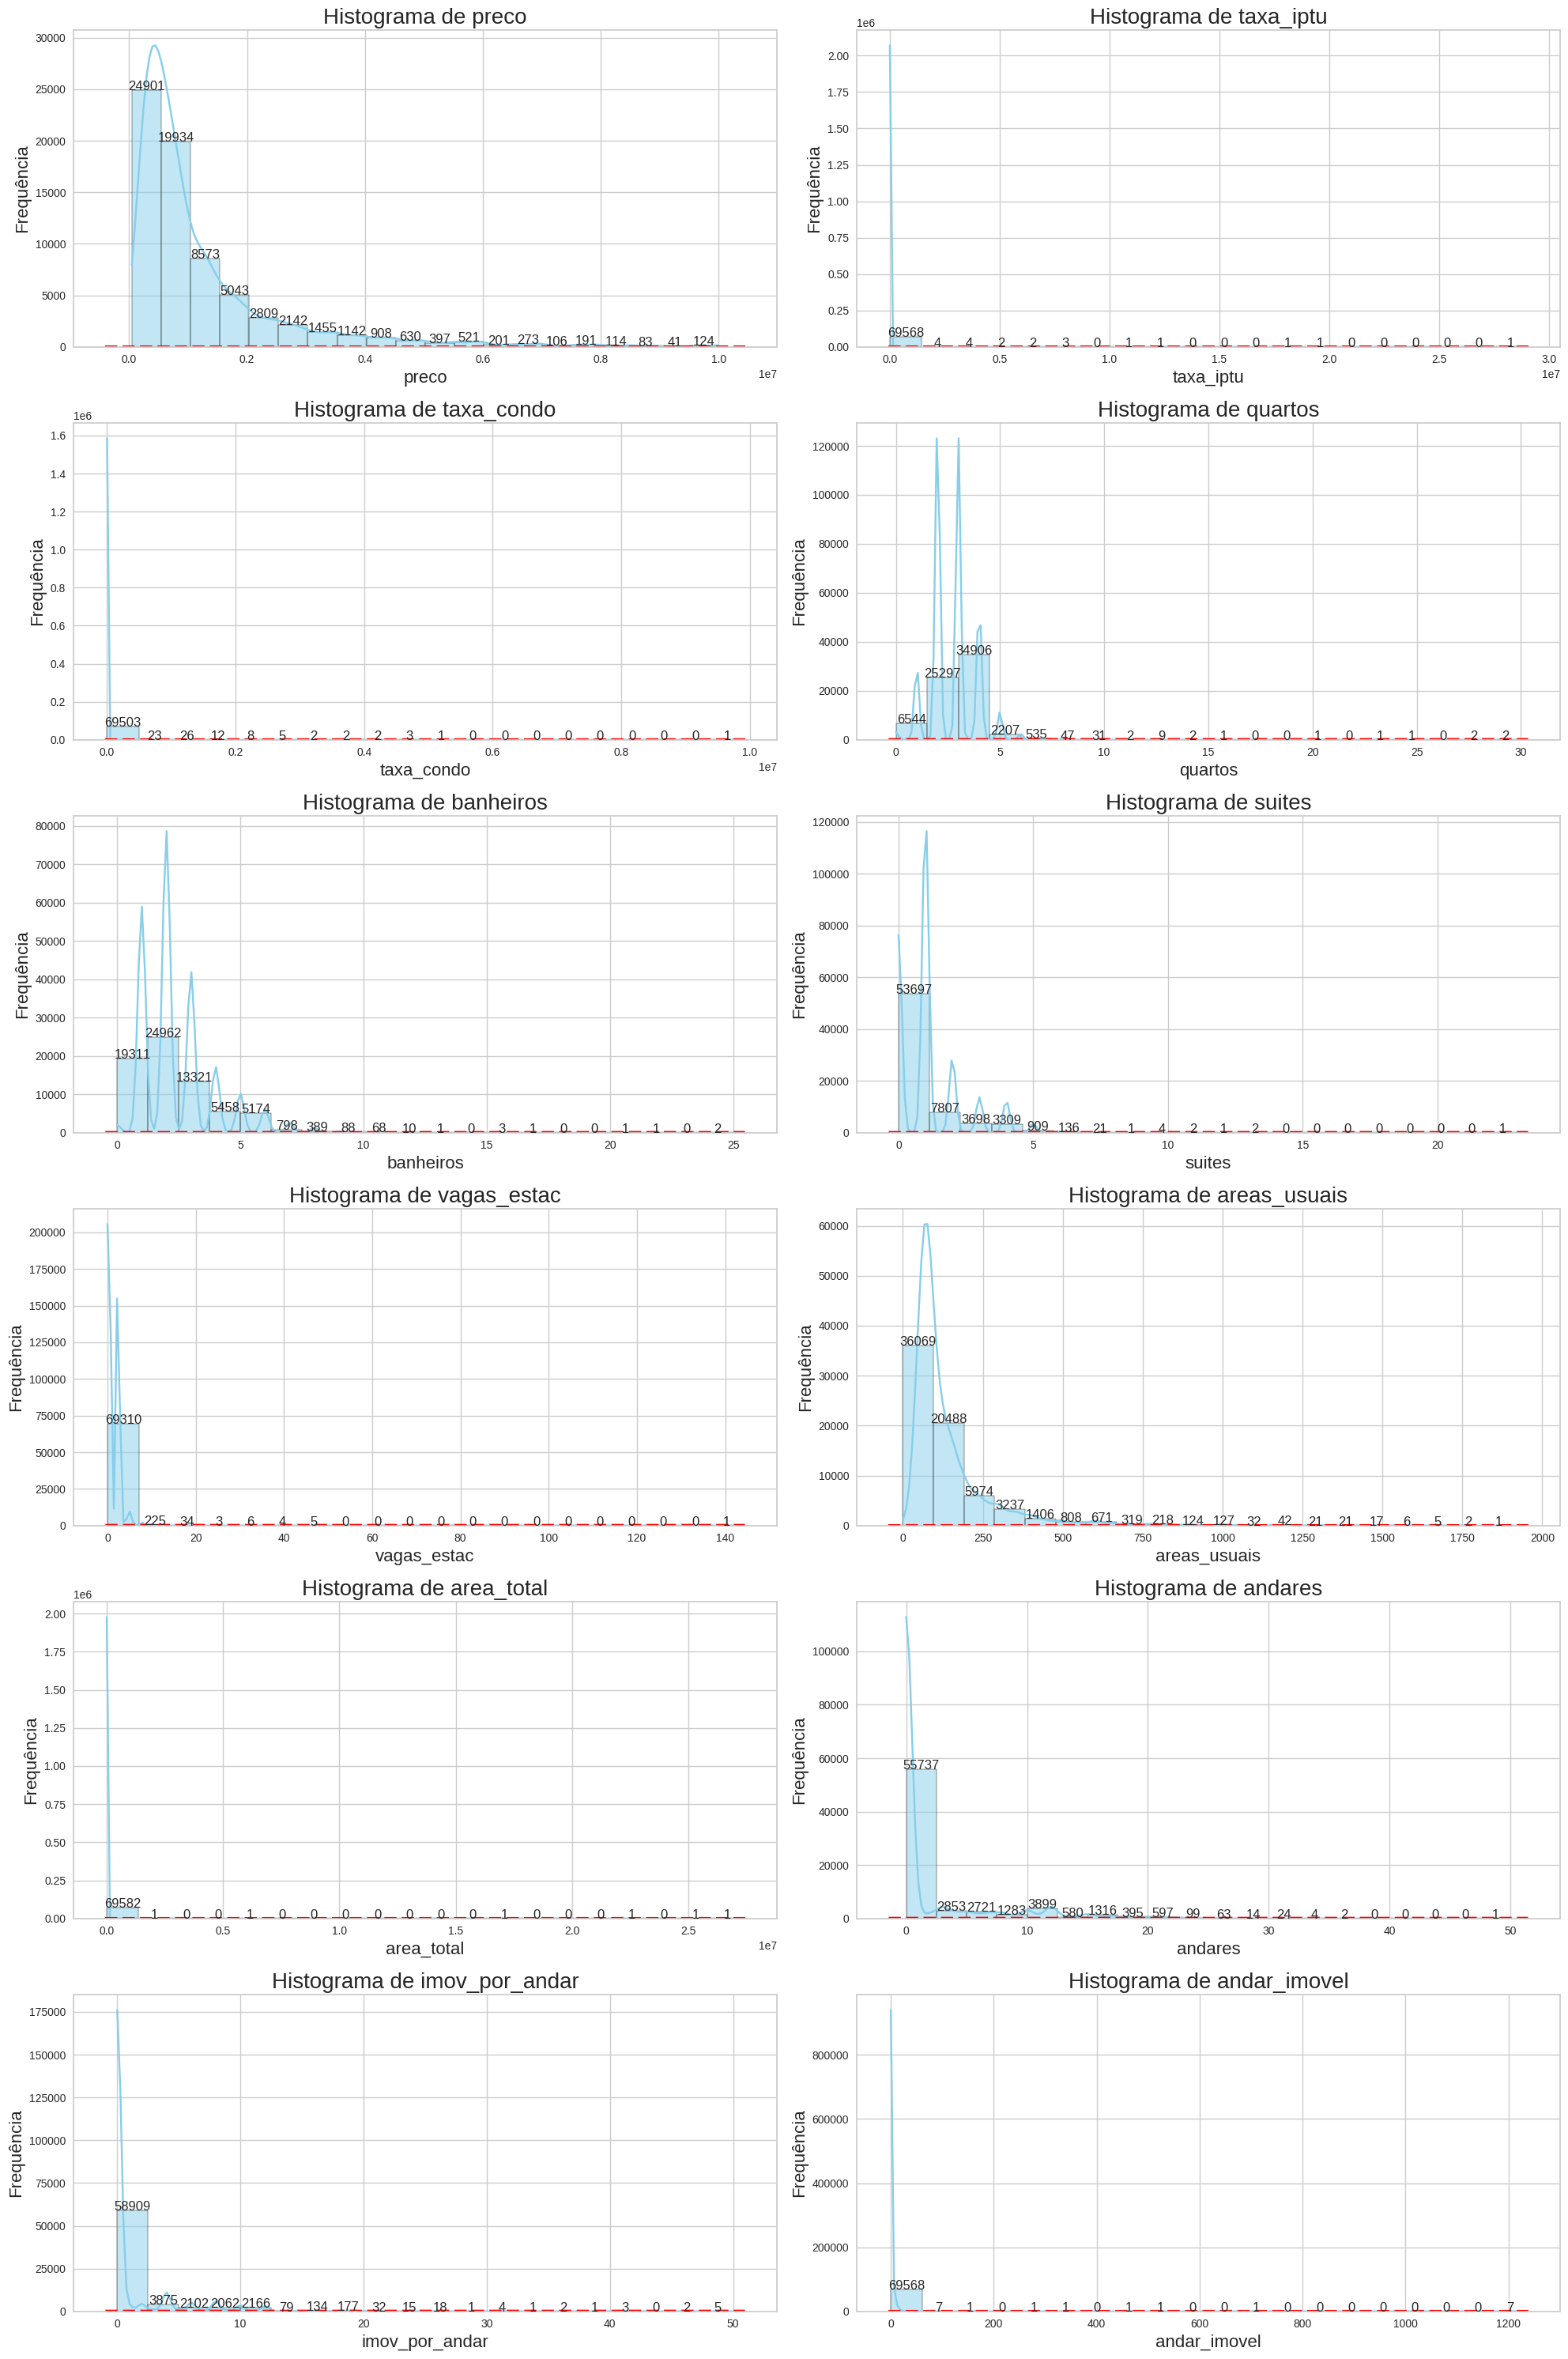

In [96]:
# Identificar as colunas numéricas
colunas_numericas = dados.select_dtypes(include=['float64', 'int64']).columns

# Definir o número de colunas e linhas para exibir 2 gráficos por linha
num_colunas = 2
num_linhas = (len(colunas_numericas) + 1) // num_colunas

# Criar a figura e os eixos
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, num_linhas * 5))

# Flatten para fácil iteração, caso haja mais de uma linha
axs = axs.flatten()

# Loop pelas colunas numéricas para criar um gráfico para cada uma
for i, coluna in enumerate(colunas_numericas):
    ax = sns.histplot(data=dados, x=coluna, kde=True, color='skyblue', bins=20, ax=axs[i])

    # Ajustar o layout de cada gráfico
    ax.set_title(f'Histograma de {coluna}', fontsize=20)
    ax.set_xlabel(coluna, fontsize=16)
    ax.set_ylabel('Frequência', fontsize=16)

    # Adicionar valores em cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.5,  # Posicionar um pouco acima da barra
                f'{int(height)}',  # Valor da frequência arredondado
                ha="center", fontsize=12)

    # Customizar o kde (linha de densidade)
    sns.kdeplot(data=dados[coluna], ax=ax, color='red', lw=3, linestyle='--')

# Ajustar a grade para que os gráficos não se sobreponham
plt.tight_layout()

# Adicionar grades
plt.grid(True)

# Exibir o gráfico
plt.show()

### Mapa de calor

Vamos utilizar o HeatMap para verificar a correlação entre as variáveis.

Text(0.5, 1.0, 'Correlação entre variáveis')

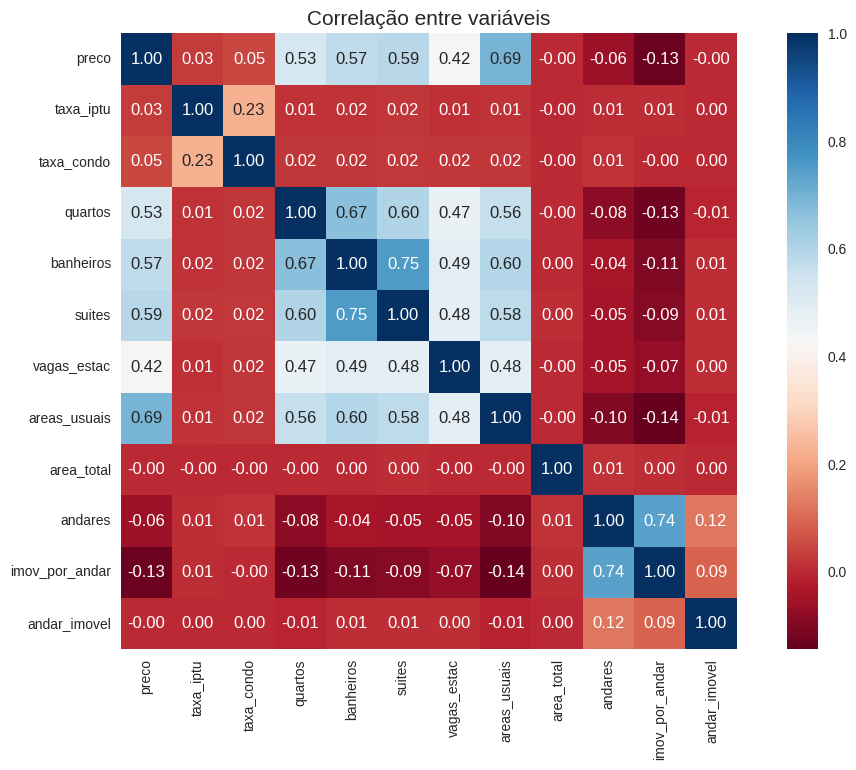

In [97]:
# Visualização das correlações
dados_numericos = dados.select_dtypes(include=[float, int])
correlacao = dados_numericos.corr()

# Matriz de Correlação com Matplotlib Seaborn
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.heatmap(correlacao, cmap='RdBu', square=True, fmt='.2f', annot=True)
ax.set_title('Correlação entre variáveis', fontsize=15)

## **4.4 Tratando outliers**

Como vimos nos tópicos 4.2 e 4.3, é possível a existência de possíveis outliers em alguns atributos do nosso dataset. Por isso, vamos analisar e tratar esses dados de forma que o nosso dataset fique o mais preparado possível.

Como iremos fazer isso:



1.   Verificar os outliers em cada atributo suspeito de ter esses pontos.
2.   Comparar esses possíveis outliers com os outros pontos a partir do preço do imóvel.
3.   Se for detectado que realmente esses dados são outliers, iremos excluir as colunas referente à eles.





### Verificando possíveis outliers

In [98]:
# Verificando outliers na coluna de vagas de estacionamento
top_5_vagas = dados.nlargest(10, 'vagas_estac')[['vagas_estac', 'preco']]
top_5_vagas.head(10)

,vagas_estac,preco
10773,144,320000.0
27222,50,579000.0
63187,50,3000000.0
1976,45,179000.0
7616,45,270000.0
64536,44,3499999.0
3473,42,210000.0
5705,40,240000.0
66071,40,4200000.0
66369,40,4300000.0


In [99]:
# Verificando outliers na coluna de suites
top_5_suites = dados.nlargest(5, 'suites')[['suites', 'preco']]
top_5_suites.head(20)

,suites,preco
64641,23,3500000.0
57310,13,1900000.0
62874,13,2900000.0
68436,12,6000000.0
31219,11,650000.0


In [100]:
# Verificando outliers na coluna de taxa de condominio
top_5_taxa_condo = dados.nlargest(10, 'taxa_condo')[['taxa_condo', 'preco']]
top_5_taxa_condo.head(10)

,taxa_condo,preco
69526,9900000.0,9990000.0
69340,5300000.0,8900000.0
67603,4800000.0,5200000.0
67028,4750000.0,4700000.0
68649,4500000.0,6500000.0
63623,4291062.0,3150000.0
60513,4102080.0,2400000.0
68650,3870500.0,6500000.0
66570,3490000.0,4480000.0
65501,3150000.0,3850000.0


In [101]:
# Verificando outliers na coluna de taxa de iptu
top_5_taxa_iptu = dados.nlargest(10, 'taxa_iptu')[['taxa_iptu', 'preco']]
top_5_taxa_iptu.head(10)

,taxa_iptu,preco
62715,29000000.0,2900000.0
69340,19000000.0,8900000.0
68650,18787860.0,6500000.0
63248,12000000.0,2999999.0
63171,10800000.0,3000000.0
59550,8030000.0,2230000.0
62554,7823000.0,2800000.0
15821,7810395.0,386000.0
60513,6527660.0,2400000.0
61610,5987777.0,2600000.0


In [102]:
# Verificando outliers na coluna de andar do imóvel
top_5_andar_imovel = dados.nlargest(10, 'andar_imovel')[['andar_imovel', 'preco']]
top_5_andar_imovel.head(20)

,andar_imovel,preco
44846,1234,1050000.0
52628,1234,1480000.0
53083,1234,1500000.0
54615,1234,1650000.0
57647,1234,1950000.0
59793,1234,2300000.0
67033,1234,4700000.0
66048,701,4100000.0
20284,504,460000.0
60149,480,2350000.0


### Tratando os outliers

Verificamos que há 1 outlier nas vagas de estacionamento, então vamos excluir esse atributo e os valores relacionados à ele.

In [103]:
# Filtra o outlier de 141 vagas de estacionamento
condicao1 = dados['vagas_estac'] >= 100

# Exclui os dados que atendem o filtro acima do dataset
dados = dados[~condicao1]

#Deletando dados não usuais e resetando o índice
dados.reset_index(drop=True, inplace=True)

Verificamos que há alguns outlier nos valores da taxa de condomínio, então vamos excluir esses atributos e os valores relacionados à ele.

Para filtrá-los, definimos a condição de que o valor do condomínio não pode ser maior ou igual que 0,5% do valor do imóvel.

In [104]:
# Calcula a condição de 0,5% do valor da coluna "preco"
condicao2 = dados['taxa_condo'] >= 0.005 * dados['preco']

# Exclui os dados que atendem à condição acima do dataset
dados = dados[~condicao2]

#Deletando dados não usuais e resetando o índice
dados.reset_index(drop=True, inplace=True)

Verificamos que há alguns outlier nos valores da taxa de iptu, então vamos excluir esses atributos e os valores relacionados à ele.

Verificamos também que os valores do iptu para imóveis residenciais na cidade do Rio de Janeiro é por volta de 1% do valor do imóvel.

Para filtrá-los, definimos a condição de que o valor do iptu não pode ser maior ou igual que 1% do valor do imóvel.

In [105]:
# Calcula a condição de 1% do valor da coluna "preco"
condicao3 = dados['taxa_iptu'] >= 0.01 * dados['preco']

# Exclui os dados que atendem à condição acima do dataset
dados = dados[~condicao3]

#Deletando dados não usuais e resetando o índice
dados.reset_index(drop=True, inplace=True)

Verificamos que há alguns outlier nos valores do andar que cada imóvel se encontra. Então vamos excluir esses atributos e os valores relacionados à ele.

Numa pesquisa rápida, verificamos que o maior edifício na cidade do Rio de Janeiro possui 43 andares apenas.

Para filtrá-los, definimos a condição de que o valor máximo que o imóvel pode está é de 43.

In [106]:
# Calcula a condição de 3% do valor da coluna "preco"
condicao4 = dados['andar_imovel'] >= 43

# Exclui os dados que atendem à condição acima do dataset
dados = dados[~condicao4]

#Deletando dados não usuais e resetando o índice
dados.reset_index(drop=True, inplace=True)

In [107]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69216 entries, 0 to 69215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tipo            69216 non-null  object 
 1   zona            69216 non-null  object 
 2   preco           69216 non-null  float64
 3   taxa_iptu       69216 non-null  float64
 4   taxa_condo      69216 non-null  float64
 5   quartos         69216 non-null  int64  
 6   banheiros       69216 non-null  int64  
 7   suites          69216 non-null  int64  
 8   vagas_estac     69216 non-null  int64  
 9   areas_usuais    69216 non-null  int64  
 10  area_total      69216 non-null  int64  
 11  andares         69216 non-null  int64  
 12  imov_por_andar  69216 non-null  int64  
 13  andar_imovel    69216 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 7.4+ MB


## **4.5 Transformação dos dados**

### Transformações

Primeiro, vamos plotar o gráfico do preço para analisarmos melhor a distribuição do preço e se é necessária a normalização.

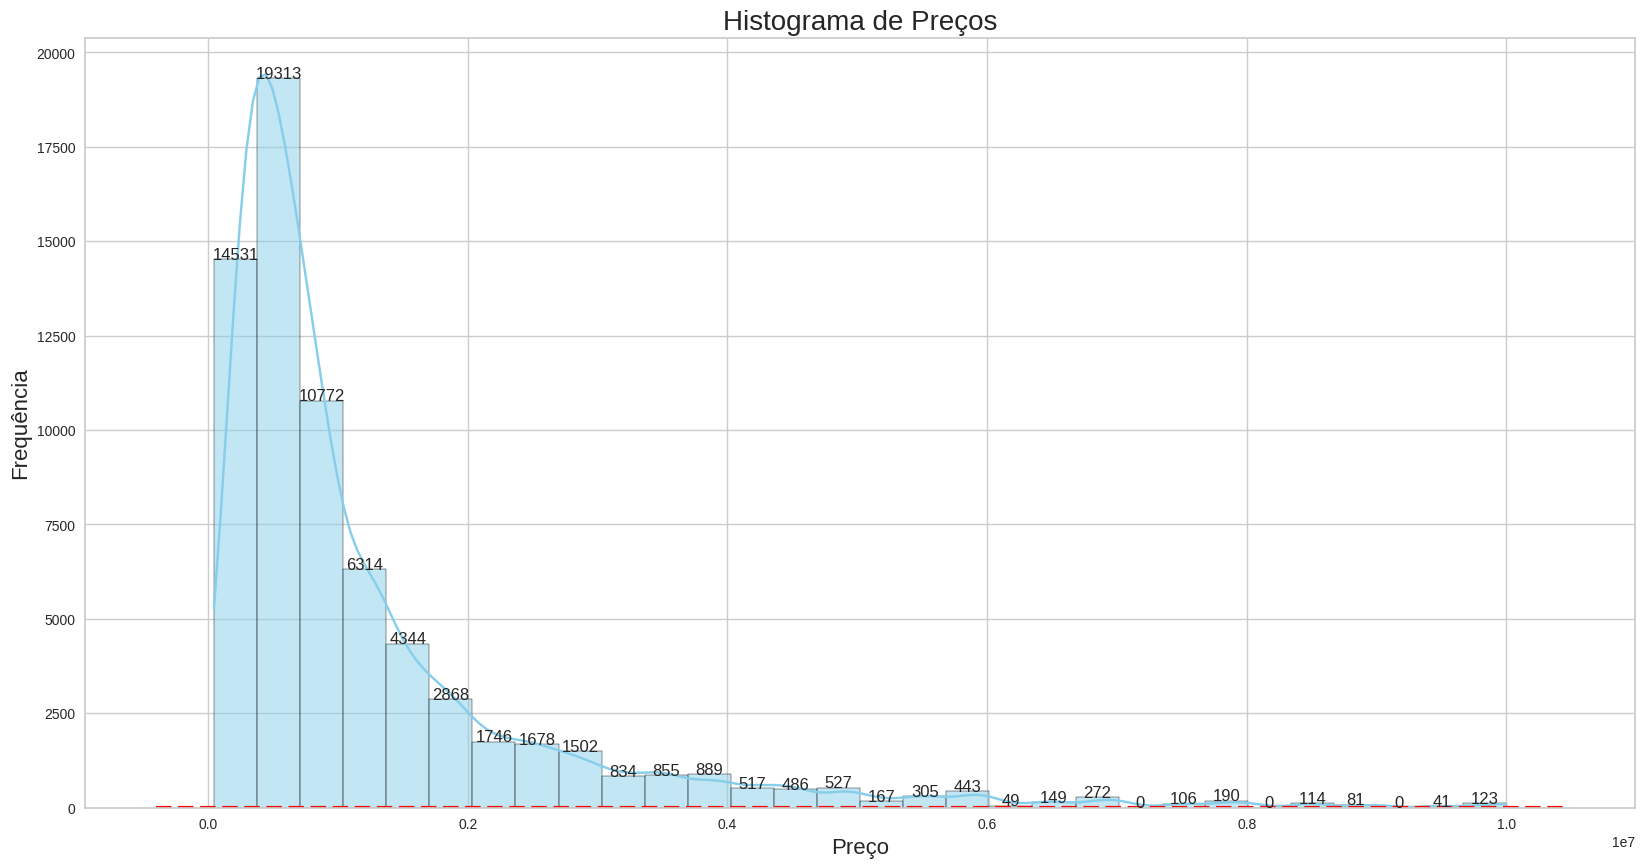

In [108]:
# Criar o histograma personalizado
ax = sns.histplot(data=dados, x='preco', kde=True, color='skyblue', bins=30)

# Ajustar o layout
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de Preços', fontsize=20)
ax.set_xlabel('Preço', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

# Adicionar valores em cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 0.5,  # Posicionar um pouco acima da barra
            f'{int(height)}',  # Valor da frequência arredondado
            ha="center", fontsize=12)

# Customizar o kde (linha de densidade)
sns.kdeplot(data=dados['preco'], ax=ax, color='red', lw=3, linestyle='--')

# Adicionar grades
plt.grid(True)

# Exibir o gráfico
plt.show()

Verificamos que a curva de preço é assimétrica e analisando os dados, decidimos normalizar, uma vez que isso afetará diretamente as previsões para casas de alto valor.

Para isso, vamos utilizar a transformação logarítmica para obtermos uma distribuição mais próxima da normal. A transformação será:

$$log1p = log(1+x)$$

É válido lembrar que será necessário realizar a transformação inversa para obter o valor original. Para isso vamos utilizar a equação abaixo:


$$expm1 = exp(x) - 1$$



In [109]:
transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [110]:
colunas_dados_tranformados = dados.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([dados.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_tranformados)], axis=1)
df_transformado.head()

,tipo,zona,preco,taxa_iptu,taxa_condo,quartos,banheiros,suites,vagas_estac,areas_usuais,area_total,andares,imov_por_andar,andar_imovel
0,Outros,Zona Oeste,10.714440,0.0,5.017280,0.000000,0.000000,0.0,0.693147,4.143135,4.143135,0.0,0.0,0.0
1,Apartamento,Zona Oeste,10.714440,0.0,4.795791,1.098612,0.693147,0.0,0.693147,3.806662,0.000000,0.0,0.0,0.0
2,Outros,Zona Oeste,10.819798,0.0,4.615121,0.000000,0.000000,0.0,0.000000,4.890349,4.890349,0.0,0.0,0.0
3,Outros,Zona Oeste,10.819798,0.0,0.000000,0.000000,0.000000,0.0,0.000000,5.303305,5.303305,0.0,0.0,0.0
4,Apartamento,Zona Norte,10.721879,0.0,0.000000,0.693147,0.693147,0.0,0.693147,3.526361,3.583519,0.0,0.0,0.0


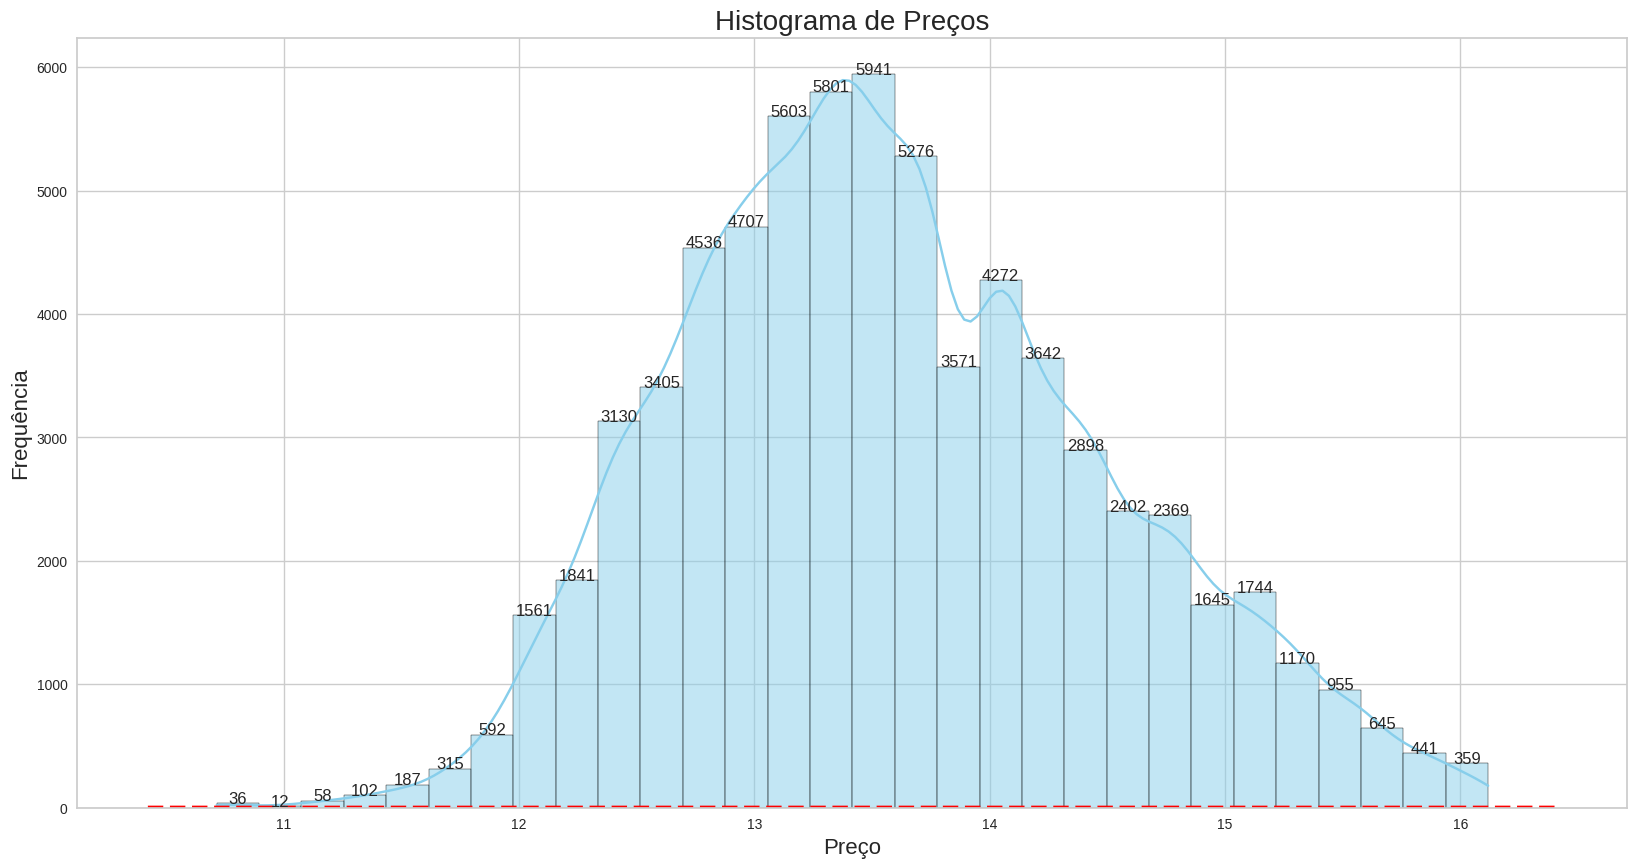

In [111]:
# Criar o histograma personalizado
ax = sns.histplot(data=df_transformado, x='preco', kde=True, color='skyblue', bins=30)

# Ajustar o layout
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de Preços', fontsize=20)
ax.set_xlabel('Preço', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

# Adicionar valores em cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 0.5,  # Posicionar um pouco acima da barra
            f'{int(height)}',  # Valor da frequência arredondado
            ha="center", fontsize=12)

# Customizar o kde (linha de densidade)
sns.kdeplot(data=df_transformado['preco'], ax=ax, color='red', lw=3, linestyle='--')

# Adicionar grades
plt.grid(True)

# Exibir o gráfico
plt.show()

### Mapa de calor

Novo mapa de calor para verificar a correlação dos atributos, uma vez que fizemos a transformação, é necessário analisar novamente,

Text(0.5, 1.0, 'Correlação entre variáveis - Tranformação Log')

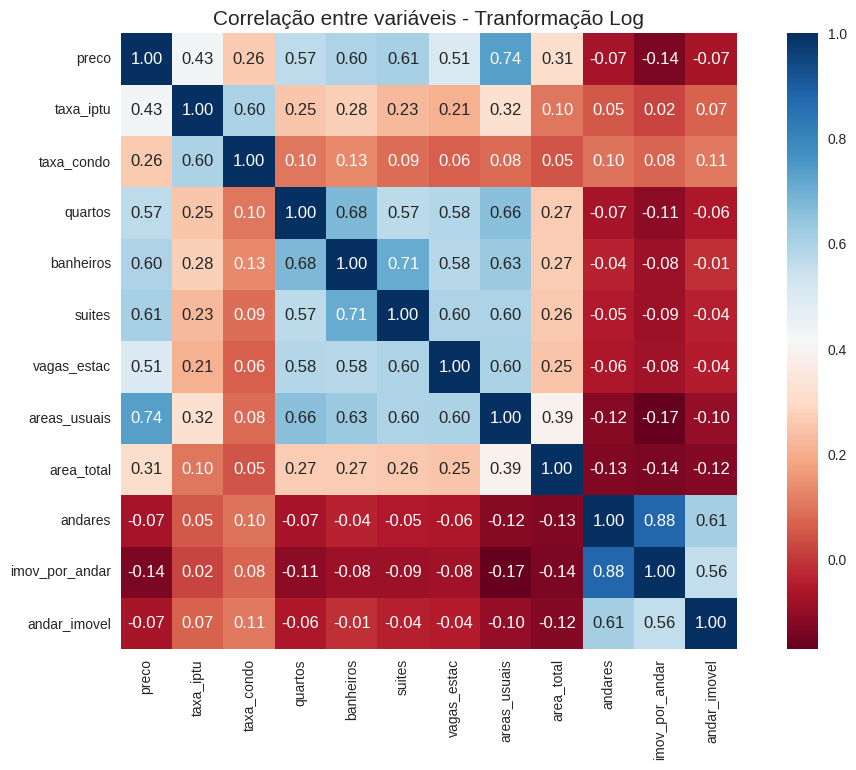

In [112]:
#Visualização das correlações
numericos = df_transformado.select_dtypes(include=[float, int])
correlacao_transformado = numericos.corr()
# Matriz de Correlação com Matplotlib Seaborn
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.heatmap(correlacao_transformado, cmap='RdBu',  square=True, fmt='.2f', annot=True)
ax.set_title('Correlação entre variáveis - Tranformação Log', fontsize=15)

### Transformando variáveis

Para conseguir prosseguirmos com a análise, temos que transformar o tipo de algumas variáveis. As colunas ***type*** e ***zone*** são do tipo objeto e por isso não há como treinar o modelo delas. E como são variáveis importantes para prever o preço dos imóveis, temos que considerá-los.

Para isso vamos utilizar a função dummies que consiste na transformação das variáveis categóricas a partir da criação de novas colunas a partir das categorias. Cada uma delas se torna uma nova coluna e o valor na linha correspondente será 1, caso tenha a presença da característica. Do contrário, será 0.

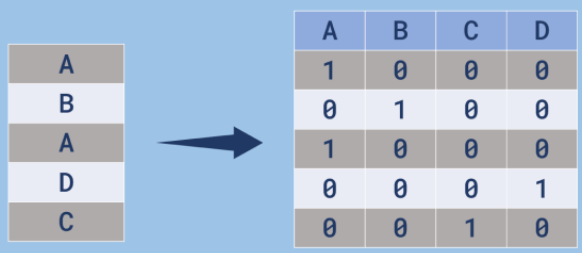

In [113]:
# Separando as variáveis do tipo objeto
variaveis_objeto = dados.select_dtypes(include=['object']).columns

# Criando variáveis dummies
df_dummies = pd.get_dummies(dados[variaveis_objeto])

# Concatenando com o conjunto de dados sem os atributos do tipo objeto
dados_numericos = pd.concat([dados.drop(variaveis_objeto, axis=1), df_dummies], axis=1)
dados_numericos.head()

,preco,taxa_iptu,taxa_condo,quartos,banheiros,suites,vagas_estac,areas_usuais,area_total,andares,imov_por_andar,andar_imovel,tipo_Apartamento,tipo_Casa,tipo_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0,False,False,True,False,False,True,False
1,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0,True,False,False,False,False,True,False
2,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0,False,False,True,False,False,True,False
3,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0,False,False,True,False,False,True,False
4,45336.0,0.0,0.0,1,1,0,1,33,35,0,0,0,True,False,False,False,True,False,False


## **4.6 Treino e teste dos dados**

### Treinando e testando

In [114]:
#Variáveis independentes
X = dados_numericos.drop('preco', axis=1)

#Variável dependente
y = dados_numericos['preco']

#Divisão em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

### Divisão do conjunto de treino em subconjuntos

Para otimizar os modelos há várias técnicas, como o ***Cross Validation*** e o ***RandomizeSearch***. Com isso, vamos dividir o conjunto de dados em subconjuntos para realizar a otimização.

In [115]:
# Definindo o número de subconjuntos
cv = KFold(n_splits = 5, shuffle=True)

# **5. Modelagem**

## **5.1. Regressão linear**

In [116]:
#Instanciando o modelo de LinearRegression
linear = LinearRegression()

# Treinando o modelo com os dados de treino
linear.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
y_pred = linear.predict(X_teste)

In [117]:
# Prediz os valores de y para os dados de treino.
y_treino_pred = linear.predict(X_treino)
# Prediz os valores de y para os dados de teste.
y_teste_pred = linear.predict(X_teste)

### Métricas de desempenho

Há algumas métricas para verificar o desempenho do modelo, como o Erro Quadrático Médio e o Coeficiente de Determinação.

**Erro quadrático médio:**

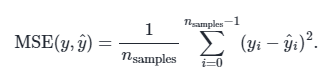

**Coeficiente de determinação:**

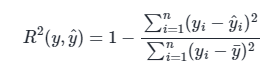

Neste notebook será utilizado o **Coeficiente de Determinação** como parâmetro de avaliação.

In [118]:
# Verificando as métricas de desempenho
r2 = r2_score(y_teste, y_pred)
print("Coeficiente de determinação:", r2)

Coeficiente de determinação: 0.7285488207838662


### Validação cruzada

In [119]:
# Realizando a validação cruzada com cross_val_score, usando 'r2' como métrica de avaliação
desemp_cv_linear = cross_val_score(estimator = linear, X = X_treino, y = y_treino,
                                       scoring = 'r2', cv = cv)

# Exibindo o desempenho médio do R²
print('Desempenho médio de r2: {}'.format(round(desemp_cv_linear.mean(), 3)))

Desempenho médio de r2: 0.724


### Random Search

In [120]:
#Seleção de hiperparâmteros
param_linear = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],  # Número de jobs para paralelismo
    'positive': [True, False]  # Para forçar coeficientes positivos
}

In [121]:
# Criação do objeto RandomizedSearchCV para a busca aleatória de hiperparâmetros
random_cv_linear = RandomizedSearchCV(linear,
    param_linear, n_iter=5, cv=cv, scoring='r2', n_jobs=-1
)

# Treinamento do modelo com diferentes combinações de hiperparâmetros
randomcv0 = random_cv_linear.fit(X_treino, y_treino)

# Converte os resultados do RandomizedSearchCV em um DataFrame
pd.DataFrame(randomcv0.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 647, in fit
    self.coef_ = optimize.nnls(X, y)[0]
  File "/usr/local/lib/python3.10/dist-pack

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_positive,param_n_jobs,param_fit_intercept,param_copy_X,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101989,0.033715,0.005935,0.005312,True,None,True,False,"{'positive': True, 'n_jobs': None, 'fit_interc...",NaN,0.721224,0.725719,NaN,0.722927,NaN,NaN,5
1,0.090751,0.013858,0.014588,0.007395,False,-1,True,False,"{'positive': False, 'n_jobs': -1, 'fit_interce...",0.71978,0.722016,0.726972,0.726228,0.724072,0.723813,0.00266,1
2,0.064779,0.027373,0.010920,0.003600,False,None,False,False,"{'positive': False, 'n_jobs': None, 'fit_inter...",0.71978,0.722016,0.726972,0.726228,0.724072,0.723813,0.00266,3
3,0.098259,0.007308,0.016695,0.002318,False,-1,False,False,"{'positive': False, 'n_jobs': -1, 'fit_interce...",0.71978,0.722016,0.726972,0.726228,0.724072,0.723813,0.00266,3
4,0.083487,0.016045,0.013681,0.006284,False,None,True,False,"{'positive': False, 'n_jobs': None, 'fit_inter...",0.71978,0.722016,0.726972,0.726228,0.724072,0.723813,0.00266,1


In [122]:
# Imprime a melhor combinação
print('A melhor combinação é:\n', randomcv0.best_params_)

A melhor combinação é:
 {'positive': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': False}


In [123]:
# Imprime o melhor score
print('O score para a melhor combinação é: ', round(randomcv0.best_score_, 3))

O score para a melhor combinação é:  0.724


### Random Search para teste




In [124]:
# Inicializa um modelo de regressão linear com os hiperparâmetros otimizados
linear_otimizado = LinearRegression(fit_intercept=False, copy_X=False, positive=False,n_jobs=None)

# Ajusta o modelo linear otimizado aos dados de treino
linear_otimizado.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
predicao_linear_otimizado = linear_otimizado.predict(X_teste)

# Calcula o coeficiente de determinação (R²)
print('O coeficiente de determinação é: ', round(r2_score(y_teste, predicao_linear_otimizado), 3))
# Calcula o Erro Absoluto Médio (MAE)
print('O Erro Absoluto Médio é: ', round(mean_absolute_error(y_teste, predicao_linear_otimizado), 3))
# Calcula o Erro Quadrático Médio (MSE)
print('O Erro Quadrático Médio é: ', round(mean_squared_error(y_teste, predicao_linear_otimizado), 3))
# Calcula a Raiz do Erro Quadrático Médio (RMSE)
print('O Raiz do Erro Quadrático Médio é: ', round(np.sqrt(mean_squared_error(y_teste, predicao_linear_otimizado)), 3))

O coeficiente de determinação é:  0.729
O Erro Absoluto Médio é:  430726.679
O Erro Quadrático Médio é:  529636678662.914
O Raiz do Erro Quadrático Médio é:  727761.416


## **5.2. Árvore de decisão**

In [125]:
#Instanciando o modelo de DecisionTreeRegressor
arvore = DecisionTreeRegressor(random_state=42, max_depth=5)

# Treinando o modelo com os dados de treino
arvore.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
previsao_arvore = arvore.predict(X_teste)

###Métrica de desempenho

In [126]:
# Coeficiente de determinação
r2_arvore = r2_score(y_teste, previsao_arvore)
print("Coeficiente de determinação:", r2_arvore)

Coeficiente de determinação: 0.7387775011060742


### Validação cruzada

In [127]:
# Realizando a validação cruzada com cross_val_score, usando 'r2' como métrica de avaliação
desemp_cv_arvore = cross_val_score(estimator = arvore, X = X_treino,
                                          y = y_treino, scoring = 'r2', cv = cv)

# Exibindo o desempenho médio do R²
print('Desempenho médio de r2: {}'.format(round(desemp_cv_arvore.mean(), 3)))

Desempenho médio de r2: 0.732


### Random Search

In [128]:
#Seleção de hiperparâmetros
param_arvore = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 14, 16],
    'max_features': ['sqrt', 'log2', 'auto'],
}

In [129]:
# Criação do objeto RandomizedSearchCV para a busca aleatória de hiperparâmetros
random_cv_arvore = RandomizedSearchCV( arvore, param_arvore, n_iter=5,
    cv=cv, scoring='r2', n_jobs=-1
)

# Treinamento do modelo com diferentes combinações de hiperparâmetros
randomcv1 = random_cv_arvore.fit(X_treino, y_treino)

# Converte os resultados do RandomizedSearchCV em um DataFrame
pd.DataFrame(randomcv1.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.332392,0.043418,0.028280,0.008715,12,6,sqrt,20,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.777974,0.787674,0.762417,0.774279,0.794449,0.779358,0.011060,1
1,0.349900,0.076452,0.034048,0.002784,12,6,sqrt,None,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.761929,0.776258,0.772254,0.779941,0.786678,0.775412,0.008245,2
2,25.394562,5.057973,0.008107,0.000732,8,6,sqrt,None,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.761786,0.763224,0.750203,0.768751,0.774421,0.763677,0.008081,3
3,0.006249,0.001031,0.000000,0.000000,12,6,auto,20,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,0.005579,0.000113,0.000000,0.000000,10,8,auto,20,absolute_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [130]:
# Imprime a melhor combinação
print('A melhor combinação é:\n', randomcv1.best_params_)

A melhor combinação é:
 {'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'squared_error'}


In [131]:
# Imprime o melhor score
print('O score para a melhor combinação é: \n', randomcv1.best_score_)

O score para a melhor combinação é: 
 0.7793584134834752


### Random Search para teste

In [132]:
# Inicializa um modelo de árvore de decisão com os hiperparâmetros otimizados
arvore_otimizado = DecisionTreeRegressor(criterion='squared_error' , max_depth=25, max_features='log2' ,
                            min_samples_leaf= 6, min_samples_split =12 )

# Ajusta o modelo linear otimizado aos dados de treino
arvore_otimizado.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
predicao_arvore_otimizado = arvore_otimizado.predict(X_teste)

# Calcula o coeficiente de determinação (R²)
print('O coeficiente de determinação é: ', round(r2_score(y_teste, predicao_arvore_otimizado), 3))
# Calcula o Erro Absoluto Médio (MAE)
print('O Erro Absoluto Médio é: ', round(mean_absolute_error(y_teste, predicao_arvore_otimizado), 3))
# Calcula o Erro Quadrático Médio (MSE)
print('O Erro Quadrático Médio é: ', round(mean_squared_error(y_teste, predicao_arvore_otimizado), 3))
# Calcula a Raiz do Erro Quadrático Médio (RMSE)
print('O Raiz do Erro Quadrático Médio é: ', round(np.sqrt(mean_squared_error(y_teste, predicao_arvore_otimizado)), 3))

O coeficiente de determinação é:  0.777
O Erro Absoluto Médio é:  331968.694
O Erro Quadrático Médio é:  435656698108.061
O Raiz do Erro Quadrático Médio é:  660042.952


## **5.3. Random Forest**

É bom ficar atento aos parâmetros que serão usados. E também é bom saber que este modelo de regressão demanda mais poder computacional. Há a biblioteca para caso de dúvidas.

[Random Florest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

In [133]:
# Instanciando o modelo de RandomForestRegressor
floresta = RandomForestRegressor(random_state=42, max_depth=None, n_estimators=10)

# Treinando o modelo com os dados de treino
floresta.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
previsao_floresta = floresta.predict(X_teste)

### Métricas de desempenho

In [134]:
# Coeficiente de determinacao
r2_floresta = r2_score(y_teste, previsao_floresta)
print("Coeficiente de determinação:", r2_floresta)

Coeficiente de determinação: 0.8517060428371855


### Validação cruzada

In [135]:
# Realizando a validação cruzada com cross_val_score, usando 'r2' como métrica de avaliação
desemp_cv_floresta = cross_val_score(estimator = floresta, X = X_treino,
                                            y = y_treino, scoring = 'r2', cv = cv)

# Exibindo o desempenho médio do R²
print('Desempenho médio de r2: {}'.format(round(desemp_cv_floresta.mean(), 3)))

Desempenho médio de r2: 0.846


### Random Search

In [136]:
# Seleção de hiperparâmetros
param_floresta = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3, 6],
}

In [137]:
# Criação do objeto RandomizedSearchCV para a busca aleatória de hiperparâmetros
random_cv_floresta = RandomizedSearchCV( floresta, param_floresta, n_iter=5, cv=cv,
                                  scoring='r2', n_jobs=-1, random_state = 42)

# Treinamento do modelo com diferentes combinações de hiperparâmetros
randomcv2 = random_cv_floresta.fit(X_treino, y_treino)

# Converte os resultados do RandomizedSearchCV em um DataFrame
pd.DataFrame(randomcv2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,52.465578,2.189088,0.588215,0.019062,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.858863,0.843864,0.856992,0.867601,0.858948,0.857254,0.007640,2
1,66.069639,1.418341,1.317247,0.281923,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.859258,0.843975,0.857152,0.867598,0.859024,0.857401,0.007621,1
2,60.911681,2.581998,0.659583,0.040875,200,8,6,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.852843,0.841290,0.853656,0.863768,0.853208,0.852953,0.007121,4
3,45.899171,1.355001,0.463093,0.052385,150,10,6,30,"{'n_estimators': 150, 'min_samples_split': 10,...",0.852473,0.841074,0.853528,0.863735,0.853179,0.852798,0.007181,5
4,58.216957,10.665182,0.726395,0.206869,200,8,6,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.852800,0.841321,0.853699,0.863789,0.853244,0.852971,0.007119,3


In [138]:
# Imprime a melhor combinação
print('A melhor combinação é:\n', randomcv2.best_params_)

A melhor combinação é:
 {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 20}


In [139]:
# Imprime o melhor score
print('O score para a melhor combinação é: \n', randomcv2.best_score_)

O score para a melhor combinação é: 
 0.8574012505606564


### Random Search para teste


In [140]:
# Inicializa um modelo de floresta aleatória com os hiperparâmetros otimizados
floresta_otimizado = RandomForestRegressor(random_state=42, max_depth=20, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

# Ajusta o modelo linear otimizado aos dados de treino
floresta_otimizado.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
predicao_floresta_otimizado = floresta_otimizado.predict(X_teste)

# Calcula o coeficiente de determinação (R²)
print('O coeficiente de determinação é: ', round(r2_score(y_teste, predicao_floresta_otimizado), 3))
# Calcula o Erro Absoluto Médio (MAE)
print('O Erro Absoluto Médio é: ', round(mean_absolute_error(y_teste, predicao_floresta_otimizado), 3))
# Calcula o Erro Quadrático Médio (MSE)
print('O Erro Quadrático Médio é: ', round(mean_squared_error(y_teste, predicao_floresta_otimizado), 3))
# Calcula a Raiz do Erro Quadrático Médio (RMSE)
print('O Raiz do Erro Quadrático Médio é: ', round(np.sqrt(mean_squared_error(y_teste, predicao_floresta_otimizado)), 3))

O coeficiente de determinação é:  0.864
O Erro Absoluto Médio é:  251236.471
O Erro Quadrático Médio é:  264641931690.675
O Raiz do Erro Quadrático Médio é:  514433.603


## **5.4 KNeighborsRegressor**

In [141]:
# Padronizar os dados, já que KNeighbors pode ser sensível a escalas
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

In [142]:
# Instanciando o modelo KNeighborsRegressor com parâmetros comumente usados
knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)  # p=2 corresponde à distância Euclidiana

# Treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
previsao_knn = knn.predict(X_teste)

### Métricas de desempenho

In [143]:
# Coeficiente de determinacao
r2_knn = r2_score(y_teste, previsao_knn)
print("Coeficiente de determinação:", r2_knn)

Coeficiente de determinação: 0.7553480853943215


### Validação cruzada

In [144]:
# Realizando a validação cruzada com cross_val_score, usando 'r2' como métrica de avaliação
desemp_cv_knn = cross_val_score(estimator=knn, X=X_treino, y=y_treino, scoring='r2', cv=cv)

# Exibindo o desempenho médio do R²
print('Desempenho médio de r2 (KNN): {}'.format(round(desemp_cv_knn.mean(), 3)))

Desempenho médio de r2 (KNN): 0.744


### Random Search

In [145]:
# Seleção de hiperparâmetros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # Número de vizinhos
    'weights': ['uniform', 'distance'],  # Pesos dos vizinhos
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Métrica de distância
    'p': [1, 2],  # Parâmetro da métrica de Minkowski, p=1 (Manhattan), p=2 (Euclidiana)
    'leaf_size': [10, 30, 50, 70]  # Tamanho das folhas na árvore de busca de vizinhos
}

In [ ]:
# Criação do objeto RandomizedSearchCV para a busca aleatória de hiperparâmetros
random_cv_knn = RandomizedSearchCV(estimator=knn,
                                   param_distributions=param_grid_knn,
                                   n_iter=20,  # Número de combinações a serem testadas
                                   cv=5,  # Validação cruzada com 5 folds
                                   scoring='r2',  # Métrica de avaliação
                                   random_state=42,
                                   n_jobs=-1)  # Usar todos os núcleos disponíveis

# Treinamento do modelo com diferentes combinações de hiperparâmetros
randomcv4 = random_cv_knn.fit(X_treino, y_treino)

# Converte os resultados do RandomizedSearchCV em um DataFrame
pd.DataFrame(randomcv4.cv_results_)

In [ ]:
# Imprime a melhor combinação
print('A melhor combinação é:\n', randomcv4.best_params_)

In [ ]:
# Imprime o melhor score
print('O score para a melhor combinação é: \n', randomcv4.best_score_)

### Random Search para teste


In [ ]:
# Inicializa um modelo de KNeighborsRegressor com os hiperparâmetros otimizados
knn_otimizado = KNeighborsRegressor(n_neighbors=11, weights='distance', metric='minkowski', p=1, leaf_size=10)

# Ajusta o modelo linear otimizado aos dados de treino
knn_otimizado.fit(X_treino_scaled, y_treino)

# Fazendo previsões no conjunto de teste
predicao_knn_otimizado = knn_otimizado.predict(X_teste_scaled)

# Calcula o coeficiente de determinação (R²)
print('O coeficiente de determinação é: ', round(r2_score(y_teste, predicao_knn_otimizado), 3))
# Calcula o Erro Absoluto Médio (MAE)
print('O Erro Absoluto Médio é: ', round(mean_absolute_error(y_teste, predicao_knn_otimizado), 3))
# Calcula o Erro Quadrático Médio (MSE)
print('O Erro Quadrático Médio é: ', round(mean_squared_error(y_teste, predicao_knn_otimizado), 3))
# Calcula a Raiz do Erro Quadrático Médio (RMSE)
print('O Raiz do Erro Quadrático Médio é: ', round(np.sqrt(mean_squared_error(y_teste, predicao_knn_otimizado)), 3))

## **5.5 AdaBoostRegressor**

In [ ]:
# Instanciando o modelo AdaBoost com árvore de decisão como estimador base
adaboost = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),  # Estimador base
    n_estimators=50,  # Número de estimadores (número de árvores)
    learning_rate=1.0,  # Taxa de aprendizado
    random_state=42  # Para reprodutibilidade
)

# Treinando o modelo com os dados de treino
adaboost.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
previsao_adaboost = adaboost.predict(X_teste)

### Métricas de desempenho

In [ ]:
# Coeficiente de determinacao
r2_adaboost = r2_score(y_teste, previsao_adaboost)
print("Coeficiente de determinação:", r2_adaboost)

### Validação cruzada

In [ ]:
# Realizando a validação cruzada com cross_val_score, usando 'r2' como métrica de avaliação
desemp_cv_adaboost = cross_val_score(estimator=adaboost, X=X_treino, y=y_treino, scoring='r2', cv=cv)

# Exibindo o desempenho médio do R²
print('Desempenho médio de r2 (AdaBoostRegressor): {}'.format(round(desemp_cv_adaboost.mean(), 3)))

### Random Search

In [ ]:
# Seleção de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],  # Número de estimadores fracos
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Taxa de aprendizado
    'loss': ['linear', 'square', 'exponential'],  # Função de perda
    'estimator__max_depth': [1, 2, 3, 5, 10],  # Profundidade máxima da árvore
    'estimator__min_samples_split': [2, 5, 10],  # Mínimo de amostras para dividir um nó
    'estimator__min_samples_leaf': [1, 2, 4],  # Mínimo de amostras em uma folha
    'estimator__max_features': [None, 'auto', 'sqrt', 'log2']  # Número de recursos a serem considerados em cada divisão
}

In [ ]:
# Criação do objeto RandomizedSearchCV para a busca aleatória de hiperparâmetros
random_cv_adaboost = RandomizedSearchCV(estimator=adaboost,
                                   param_distributions=param_grid,
                                   n_iter=20,  # Número de combinações a serem testadas
                                   cv=5,  # Validação cruzada com 5 folds
                                   scoring='r2',  # Métrica de avaliação
                                   random_state=42,
                                   n_jobs=-1)  # Usar todos os núcleos disponíveis

# Treinamento do modelo com diferentes combinações de hiperparâmetros
randomcv5 = random_cv_adaboost.fit(X_treino, y_treino)

# Converte os resultados do RandomizedSearchCV em um DataFrame
pd.DataFrame(randomcv5.cv_results_)

In [ ]:
# Imprime a melhor combinação
print('A melhor combinação é:\n', randomcv5.best_params_)

In [ ]:
# Imprime o melhor score
print('O score para a melhor combinação é: \n', randomcv5.best_score_)

### Random Search para teste


In [ ]:
# Inicializa um modelo de AdaBoostRegressor com os hiperparâmetros otimizados
adaboost_otimizado = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(
        max_depth=10,                   # Profundidade máxima da árvore
        min_samples_split=10,            # Mínimo de amostras para dividir um nó
        min_samples_leaf=2,             # Mínimo de amostras em uma folha
        max_features='log2'             # Número de recursos a serem considerados em cada divisão
    ),
    n_estimators=300,                   # Número de estimadores fracos
    learning_rate=0.1,                  # Taxa de aprendizado
    loss='square',                 # Função de perda (pode ser 'linear', 'square' ou 'exponential')
    random_state=42                     # Para reprodutibilidade
)

# Ajusta o modelo linear otimizado aos dados de treino
adaboost_otimizado.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
predicao_adaboost_otimizado = adaboost_otimizado.predict(X_teste)

# Calcula o coeficiente de determinação (R²)
print('O coeficiente de determinação é: ', round(r2_score(y_teste, predicao_adaboost_otimizado), 3))
# Calcula o Erro Absoluto Médio (MAE)
print('O Erro Absoluto Médio é: ', round(mean_absolute_error(y_teste, predicao_adaboost_otimizado), 3))
# Calcula o Erro Quadrático Médio (MSE)
print('O Erro Quadrático Médio é: ', round(mean_squared_error(y_teste, predicao_adaboost_otimizado), 3))
# Calcula a Raiz do Erro Quadrático Médio (RMSE)
print('O Raiz do Erro Quadrático Médio é: ', round(np.sqrt(mean_squared_error(y_teste, predicao_adaboost_otimizado)), 3))

## **5.6 GradientBoostingRegressor**

In [ ]:
# Instanciando o modelo GradientBoostingRegressor com parâmetros comuns
gbr = GradientBoostingRegressor(
    n_estimators=100,      # Número de árvores (estimadores)
    learning_rate=0.1,     # Taxa de aprendizado
    max_depth=3,           # Profundidade máxima das árvores
    min_samples_split=2,   # Número mínimo de amostras necessárias para dividir um nó
    min_samples_leaf=1,    # Número mínimo de amostras em cada folha
    random_state=42        # Para garantir a reprodutibilidade dos resultados
)

# Treinando o modelo com os dados de treino
gbr.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
previsao_gbr = gbr.predict(X_teste)

### Validação cruzada

In [ ]:
# Realizando a validação cruzada com cross_val_score, usando 'r2' como métrica de avaliação
desemp_cv_gbr = cross_val_score(estimator=gbr, X=X_treino, y=y_treino, scoring='r2', cv=cv)

# Exibindo o desempenho médio do R²
print('Desempenho médio de r2 (GradientBoostingRegressor): {}'.format(round(desemp_cv_gbr.mean(), 3)))

### Random Search

In [ ]:
# Seleção de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],  # Número de estimadores fracos
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Taxa de aprendizado
    'max_depth': [3, 5, 7, 10],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Mínimo de amostras em uma folha
    'subsample': [0.8, 0.9, 1.0],  # Porcentagem de amostras usadas para treinar cada árvore
    'max_features': [None, 'auto', 'sqrt', 'log2']  # Número de recursos a serem considerados em cada divisão
}

In [ ]:
# Criação do objeto RandomizedSearchCV para a busca aleatória de hiperparâmetros
random_cv_gbr = RandomizedSearchCV(estimator=gbr,
                                   param_distributions=param_grid,
                                   n_iter=20,  # Número de combinações a serem testadas
                                   cv=5,  # Validação cruzada com 5 folds
                                   scoring='r2',  # Métrica de avaliação
                                   random_state=42,
                                   n_jobs=-1)  # Usar todos os núcleos disponíveis

# Treinamento do modelo com diferentes combinações de hiperparâmetros
randomcv6 = random_cv_gbr.fit(X_treino, y_treino)

# Converte os resultados do RandomizedSearchCV em um DataFrame
pd.DataFrame(randomcv6.cv_results_)

In [ ]:
# Imprime a melhor combinação
print('A melhor combinação é:\n', randomcv6.best_params_)

In [ ]:
# Imprime o melhor score
print('O score para a melhor combinação é: \n', randomcv6.best_score_)

### Random Search para teste


In [ ]:
# Inicializa um modelo de GradientBoostingRegressor com os hiperparâmetros otimizados
gbr_otimizado = GradientBoostingRegressor(
    random_state=42,
    n_estimators=500,          # Número de árvores
    learning_rate=0.01,        # Taxa de aprendizado
    max_depth=7,              # Profundidade máxima das árvores
    max_features=None,       # Número de recursos a serem considerados em cada divisão
    min_samples_split=2,      # Mínimo de amostras para dividir um nó
    min_samples_leaf=4,       # Mínimo de amostras em um nó folha
    subsample=1.0             # Fração de amostras usadas para treinar cada árvore
)

# Ajusta o modelo linear otimizado aos dados de treino
gbr_otimizado.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
predicao_gbr_otimizado = gbr_otimizado.predict(X_teste)

# Calcula o Coeficiente de Determinação (R²)
print('O coeficiente de determinação é: ', round(r2_score(y_teste, predicao_gbr_otimizado), 3))
# Calcula o Erro Absoluto Médio (MAE)
print('O Erro Absoluto Médio é: ', round(mean_absolute_error(y_teste, predicao_gbr_otimizado), 3))
# Calcula o Erro Quadrático Médio (MSE)
print('O Erro Quadrático Médio é: ', round(mean_squared_error(y_teste, predicao_gbr_otimizado), 3))
# Calcula a Raiz do Erro Quadrático Médio (RMSE)
print('O Raiz do Erro Quadrático Médio é: ', round(np.sqrt(mean_squared_error(y_teste, predicao_gbr_otimizado)), 3))

# Mostrando os erros de predição

In [ ]:
# Criando uma lista com os modelos
models = [
    ('Linear', linear),
    ('Decision Tree', arvore),
    ('Random Forest', floresta),
    ('KNN', knn),
    ('AdaBoost', adaboost),
    ('Gradient Boosting', gbr)
]

# Criando subplots em um layout de 4x2 (8 subplots, mas usaremos apenas 7)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

# Para remover o último gráfico que sobra
#axes[-1, -1].axis('off')

# Iterando sobre os modelos e gerando gráficos
for (name, model), ax in zip(models, axes.ravel()):  # ravel para achatar a matriz de eixos
    # Criando o visualizador PredictionError para cada modelo
    visualizer = PredictionError(model, ax=ax, title=f'Prediction Error for {name}')

    # Treinando o modelo
    visualizer.fit(X_treino, y_treino)

    # Avaliando no conjunto de teste
    visualizer.score(X_teste, y_teste)

    # Exibindo o gráfico
    visualizer.finalize()

# Ajustando o layout
plt.tight_layout()
plt.show()

In [ ]:
# Criando uma lista com os modelos
models = [
    ('Linear', linear),
    ('Decision Tree', arvore),
    ('Random Forest', floresta),
    ('KNN', knn),
    ('AdaBoost', adaboost),
    ('Gradient Boosting', gbr)
]

# Criando subplots em um layout de 4x2 (8 subplots, mas usaremos apenas 6)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

# Para remover o último gráfico que sobra
#axes[-1, -1].axis('off')

# Iterando sobre os modelos e gerando gráficos de resíduos
for (name, model), ax in zip(models, axes.ravel()):  # ravel para achatar a matriz de eixos
    # Plotando os resíduos para cada modelo
    viz = residuals_plot(model, X_treino, y_treino, X_teste, y_teste, ax=ax)
    ax.set_title(f'Residuals Plot for {name}')

    # Treinando o modelo
    viz.fit(X_treino, y_treino)

    # Avaliando no conjunto de teste
    viz.score(X_teste, y_teste)

    # Exibindo o gráfico
    viz.finalize()


# Ajustando o layout
plt.tight_layout()
plt.show()

# **Resultados**

In [ ]:
#tabela de resultados

print("Cross Validation")
print("="*40)
print("Regressão Linear: %f" % round(desemp_cv_linear.mean(), 3))
print("Árvore de Decisão: %f" % round(desemp_cv_arvore.mean(), 3))
print("Floresta Aleatória: %f" % round(desemp_cv_floresta.mean(), 3))
print("KNN: %f" % round(desemp_cv_knn.mean(), 3))
print("AdaBoostRegressor: %f" % round(desemp_cv_adaboost.mean(), 3))
print("GradientBoostingRegressor: %f" % round(desemp_cv_gbr.mean(), 3))
print("="*40)

print('\nRandom Search')
print("="*40)
print("Regressão Linear: %f" % r2_score(y_teste, predicao_linear_otimizado))
print("Árvore de Decisão: %f" % r2_score(y_teste, predicao_arvore_otimizado))
print("Floresta Aleatória: %f" % r2_score(y_teste, predicao_floresta_otimizado))
print("KNN: %f" % r2_score(y_teste, predicao_knn_otimizado))
print("AdaBoostRegressor: %f" % r2_score(y_teste, predicao_adaboost_otimizado))
print("GradientBoostingRegressor: %f" % r2_score(y_teste, predicao_gbr_otimizado))
print("*"*40)
